# Sample Superstore

## EDA

In [1]:
# load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
train = pd.read_csv('SampleSuperstore.csv')
train.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Understand of Data

In [3]:
# See Information About Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# See Shape of Data
train.shape

(9994, 13)

In [5]:
# See Columns 
train.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# See Uniques of Values
train.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
# See Status About Data
train.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Cleanning 

In [8]:
# See Missing Values
print(train.isnull().sum(),train.isnull(),sep='\n\n')

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

      Ship Mode  Segment  Country   City  State  Postal Code  Region  \
0         False    False    False  False  False        False   False   
1         False    False    False  False  False        False   False   
2         False    False    False  False  False        False   False   
3         False    False    False  False  False        False   False   
4         False    False    False  False  False        False   False   
...         ...      ...      ...    ...    ...          ...     ...   
9989      False    False    False  False  False        False   False   
9990      False    False    False  False  False        False   False   
9991      False    False    False  False  False        False   False   
9992      False    False    Fals

In [9]:
# Remove Less Important Columns
train.drop(columns=['Country','Postal Code'],inplace=True,axis=0)
# Rename of Columns
train.rename(columns={'Sub-Category':'Sub_Category'},inplace=True)

## Visulizition of Data

### Which is Shipe Mode common to use  ?

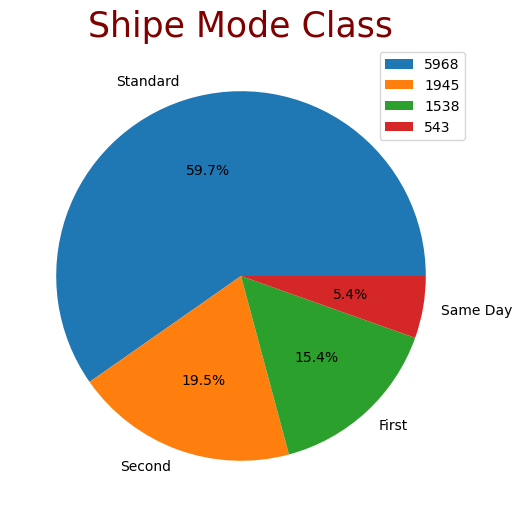

In [10]:
plt.rcParams['figure.figsize'] = (8,6)
labels = ['Standard','Second','First','Same Day']
size = train['Ship Mode'].value_counts()
plt.pie(labels=labels,x=size,autopct='%1.1f%%',startangle=0)
plt.title('Shipe Mode Class',fontsize=25,color='maroon')
plt.legend(size)

### Which is Category is Best Seller ?

Text(0.5, 1.0, 'Category Best Seller')

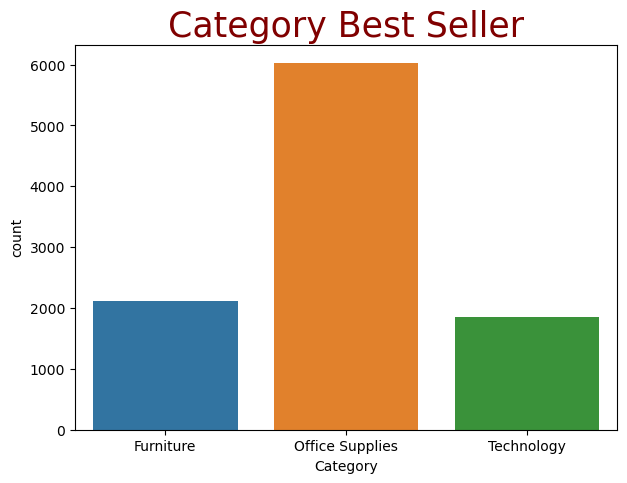

In [11]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(data=train,x='Category')
plt.title('Category Best Seller',fontsize=25,color='maroon')

### Which is Region have High Orders ?

Text(0.5, 1.0, 'Orders in each Region')

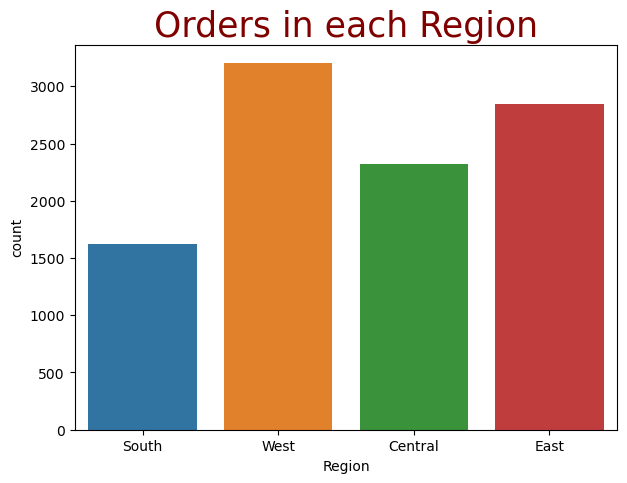

In [12]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(data=train,x='Region')
plt.title('Orders in each Region',fontsize=25,color='maroon')

### Which is Region have High Sales ?

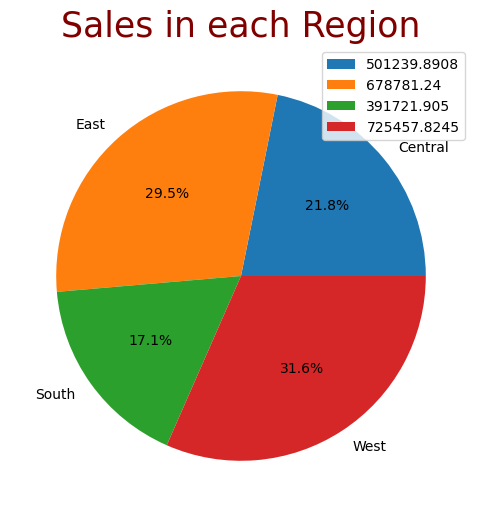

In [13]:
plt.rcParams['figure.figsize'] = (8,6)
Sales_values = dict(train.Sales.groupby(train.Region).sum())
key = Sales_values.keys()
value = Sales_values.values()
plt.pie(labels=key,x=value,autopct='%1.1f%%',startangle=0)
plt.title('Sales in each Region',fontsize=25,color='maroon')
plt.legend(value)

### Which is Segment have High Orders ?

Text(0.5, 1.0, 'Orders in each Segment')

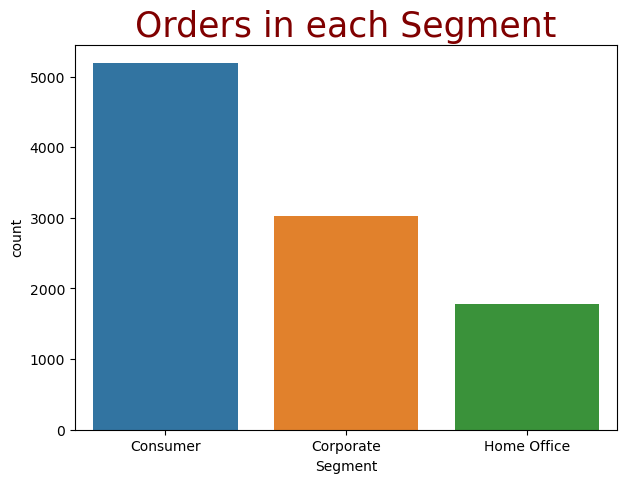

In [14]:
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(data=train,x='Segment')
plt.title('Orders in each Segment',fontsize=25,color='maroon')

### Which is Sub-Category have High Orders ?

Text(0.5, 1.0, 'Orders in each Sub-Category')

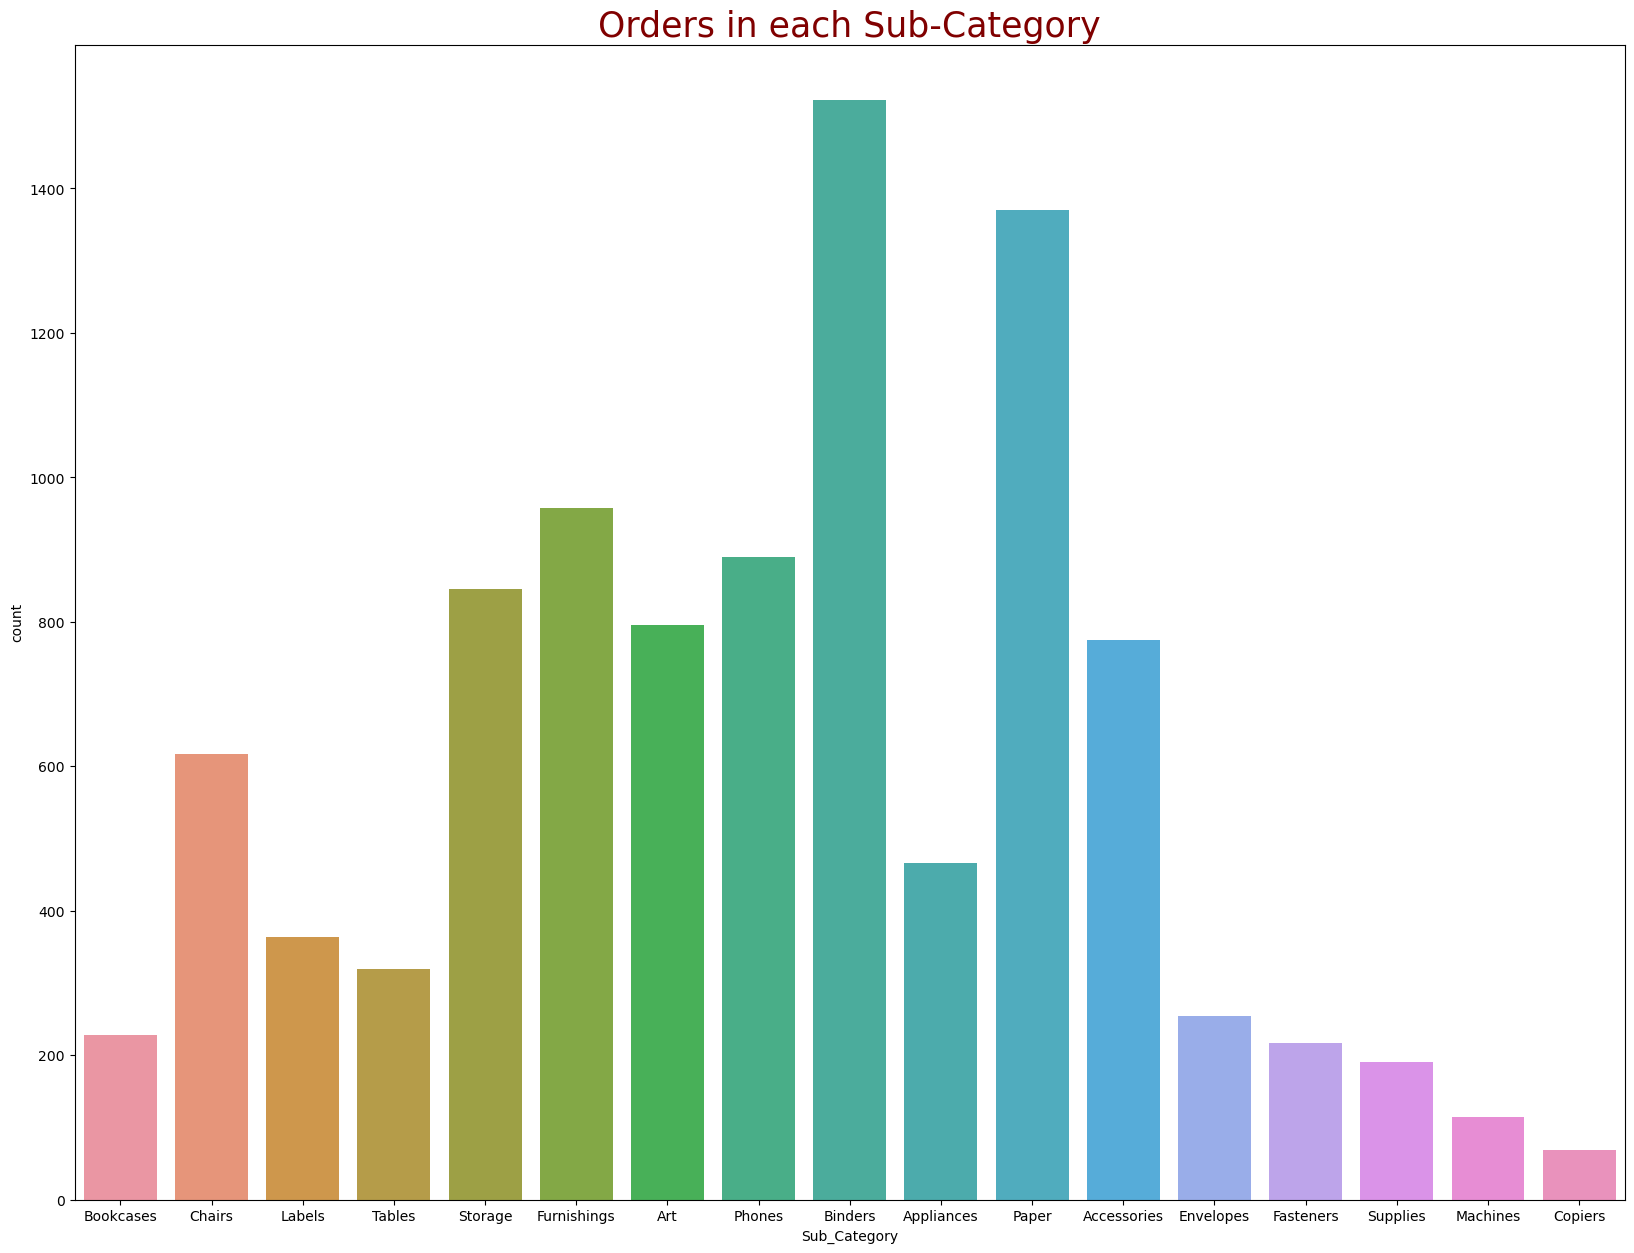

In [15]:
plt.rcParams['figure.figsize'] = (20,15)
sns.countplot(data=train,x='Sub_Category')
plt.title('Orders in each Sub-Category',fontsize=25,color='maroon')

### Which is Sub-Category have High Sales?

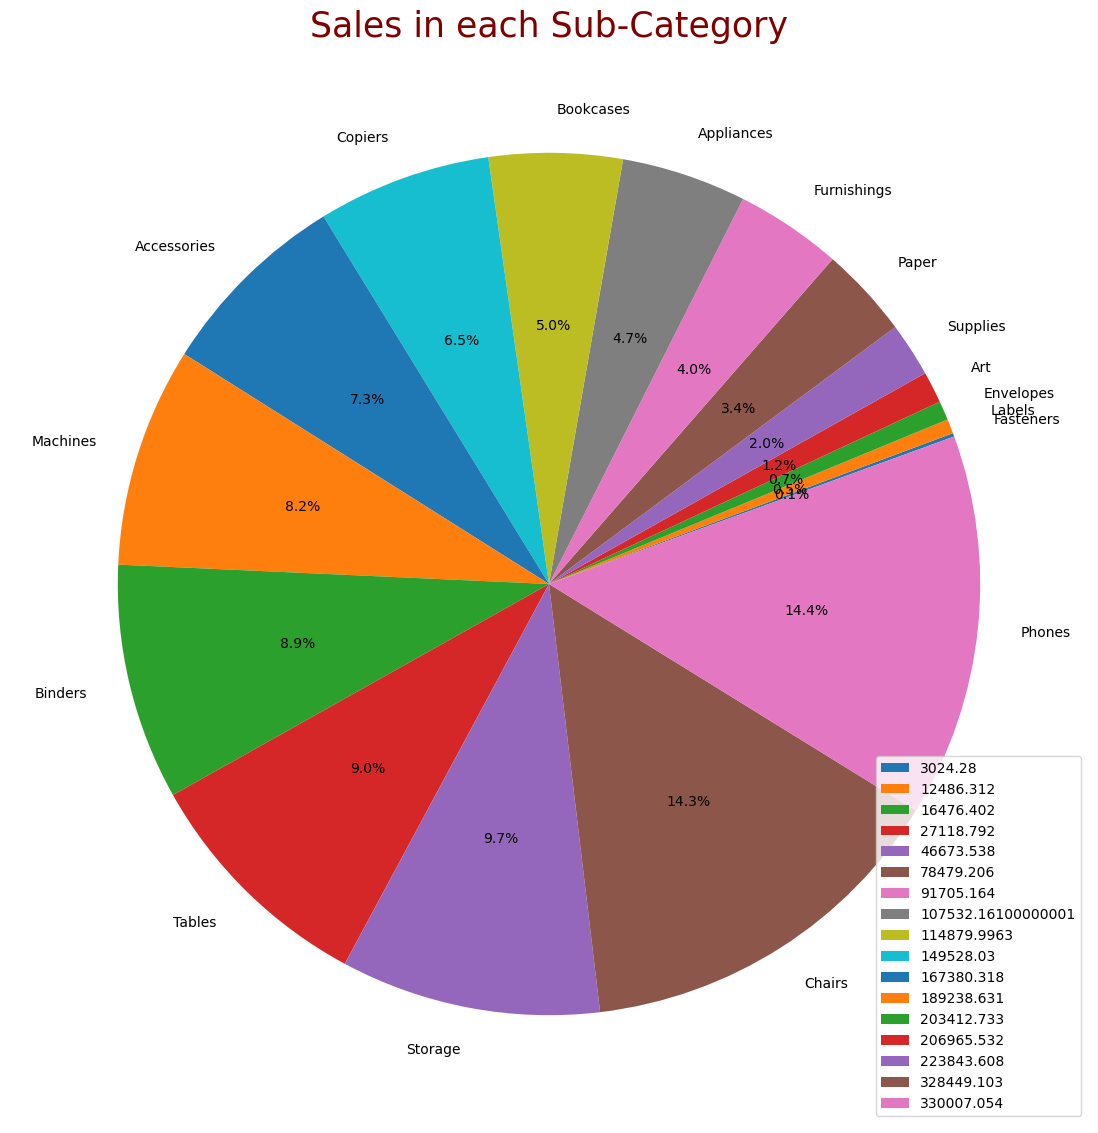

In [16]:
plt.rcParams['figure.figsize'] = (17,14)
Sales_values = dict(train.Sales.groupby(train['Sub_Category']).sum().sort_values())
key = Sales_values.keys()
value = Sales_values.values()
plt.pie(labels=key,x=value,autopct='%1.1f%%',startangle=20)
plt.title('Sales in each Sub-Category',fontsize=25,color='maroon')
plt.legend(value)

### Which is Sub-Category have High Quantity of Sales?

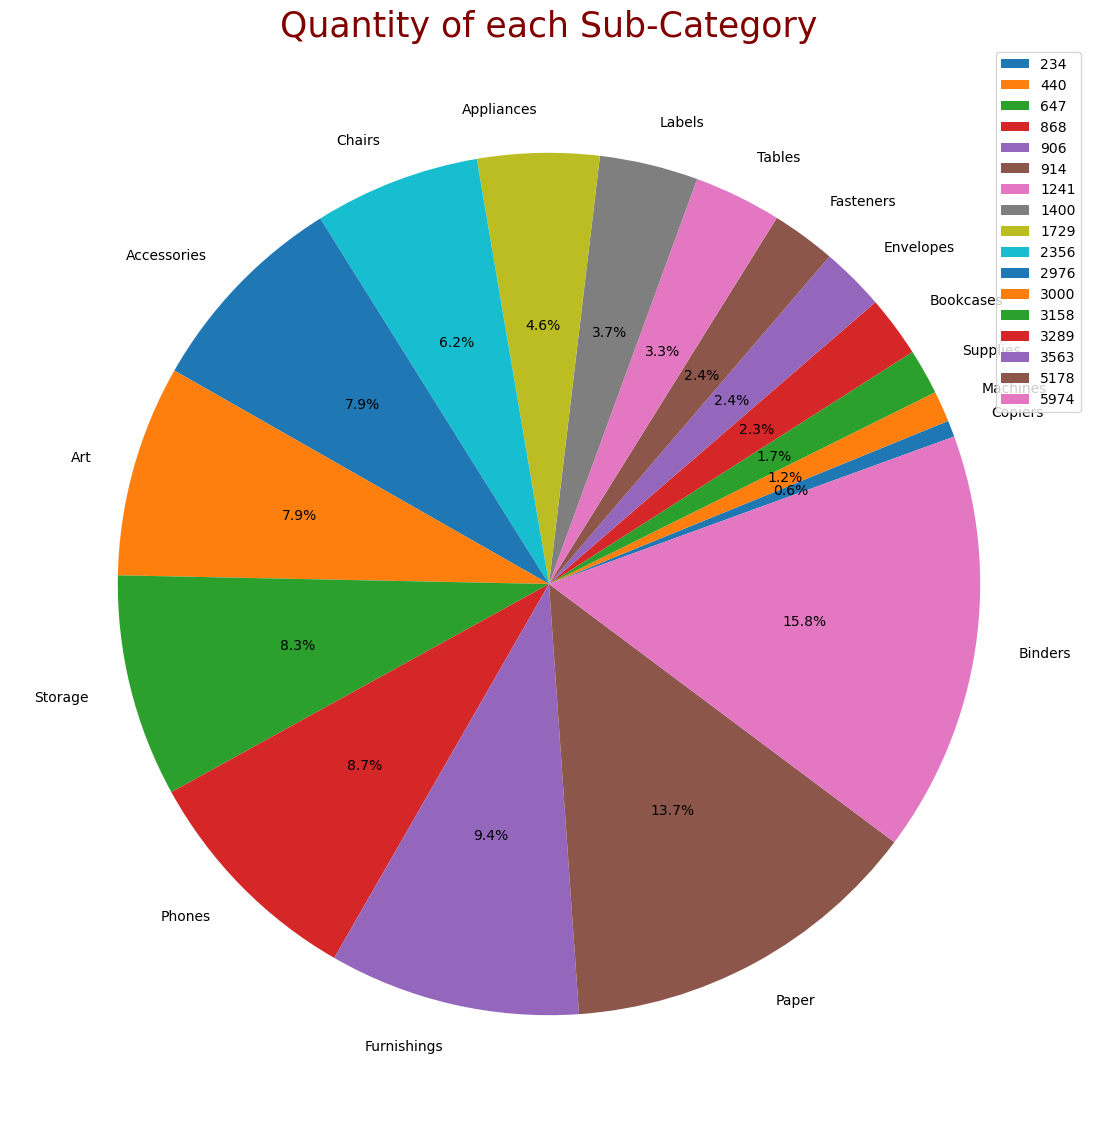

In [17]:
plt.rcParams['figure.figsize'] = (17,14)
Sales_values = dict(train.Quantity.groupby(train['Sub_Category']).sum().sort_values())
key = Sales_values.keys()
value = Sales_values.values()
plt.pie(labels=key,x=value,autopct='%1.1f%%',startangle=20)
plt.title('Quantity of each Sub-Category',fontsize=25,color='maroon')
plt.legend(value)

### Which is State have High Sales?

Text(0.5, 1.0, 'Sales of each State')

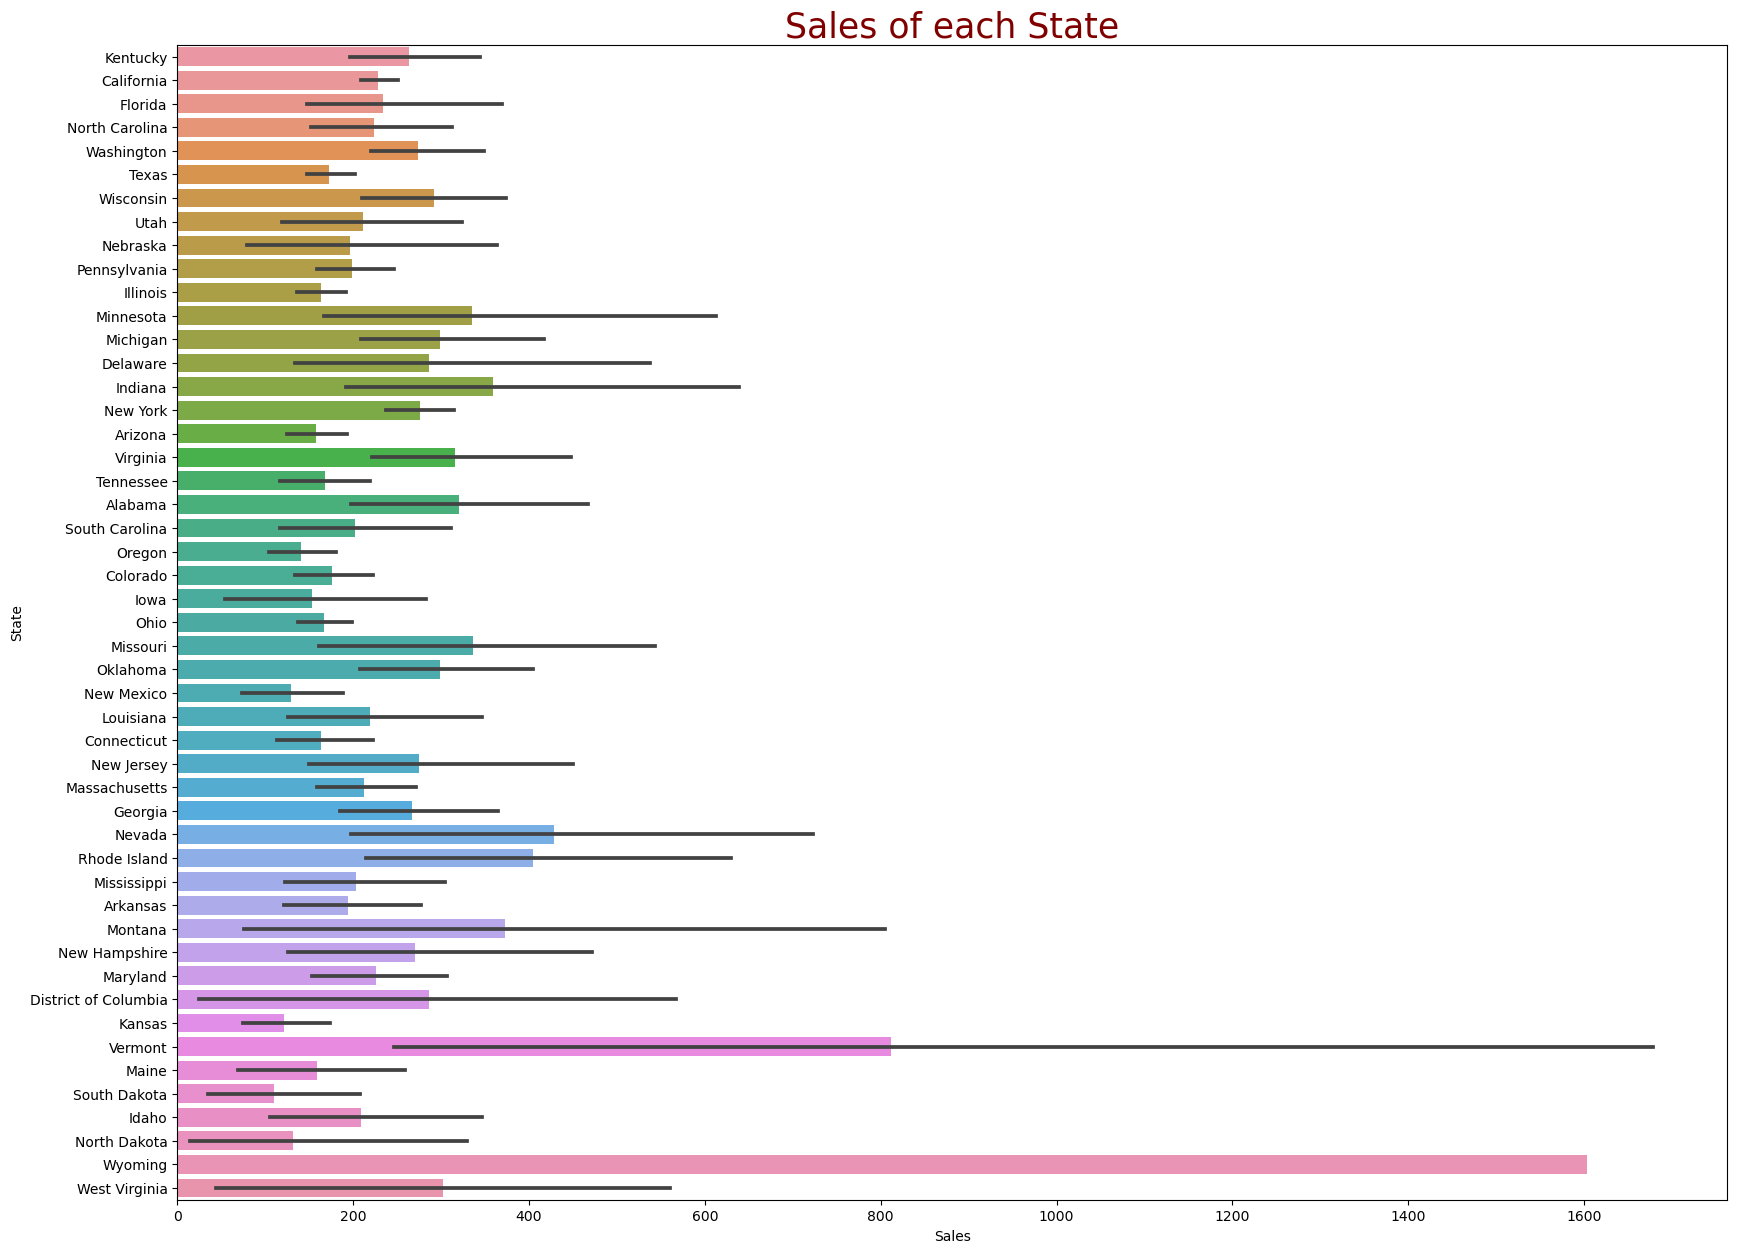

In [18]:
plt.rcParams['figure.figsize'] = (20,15)
sns.barplot(data=train,x='Sales',y='State')
plt.title('Sales of each State',fontsize=25,color='maroon')

### Which is State have High Profit?

Text(0.5, 1.0, 'Profit of each State')

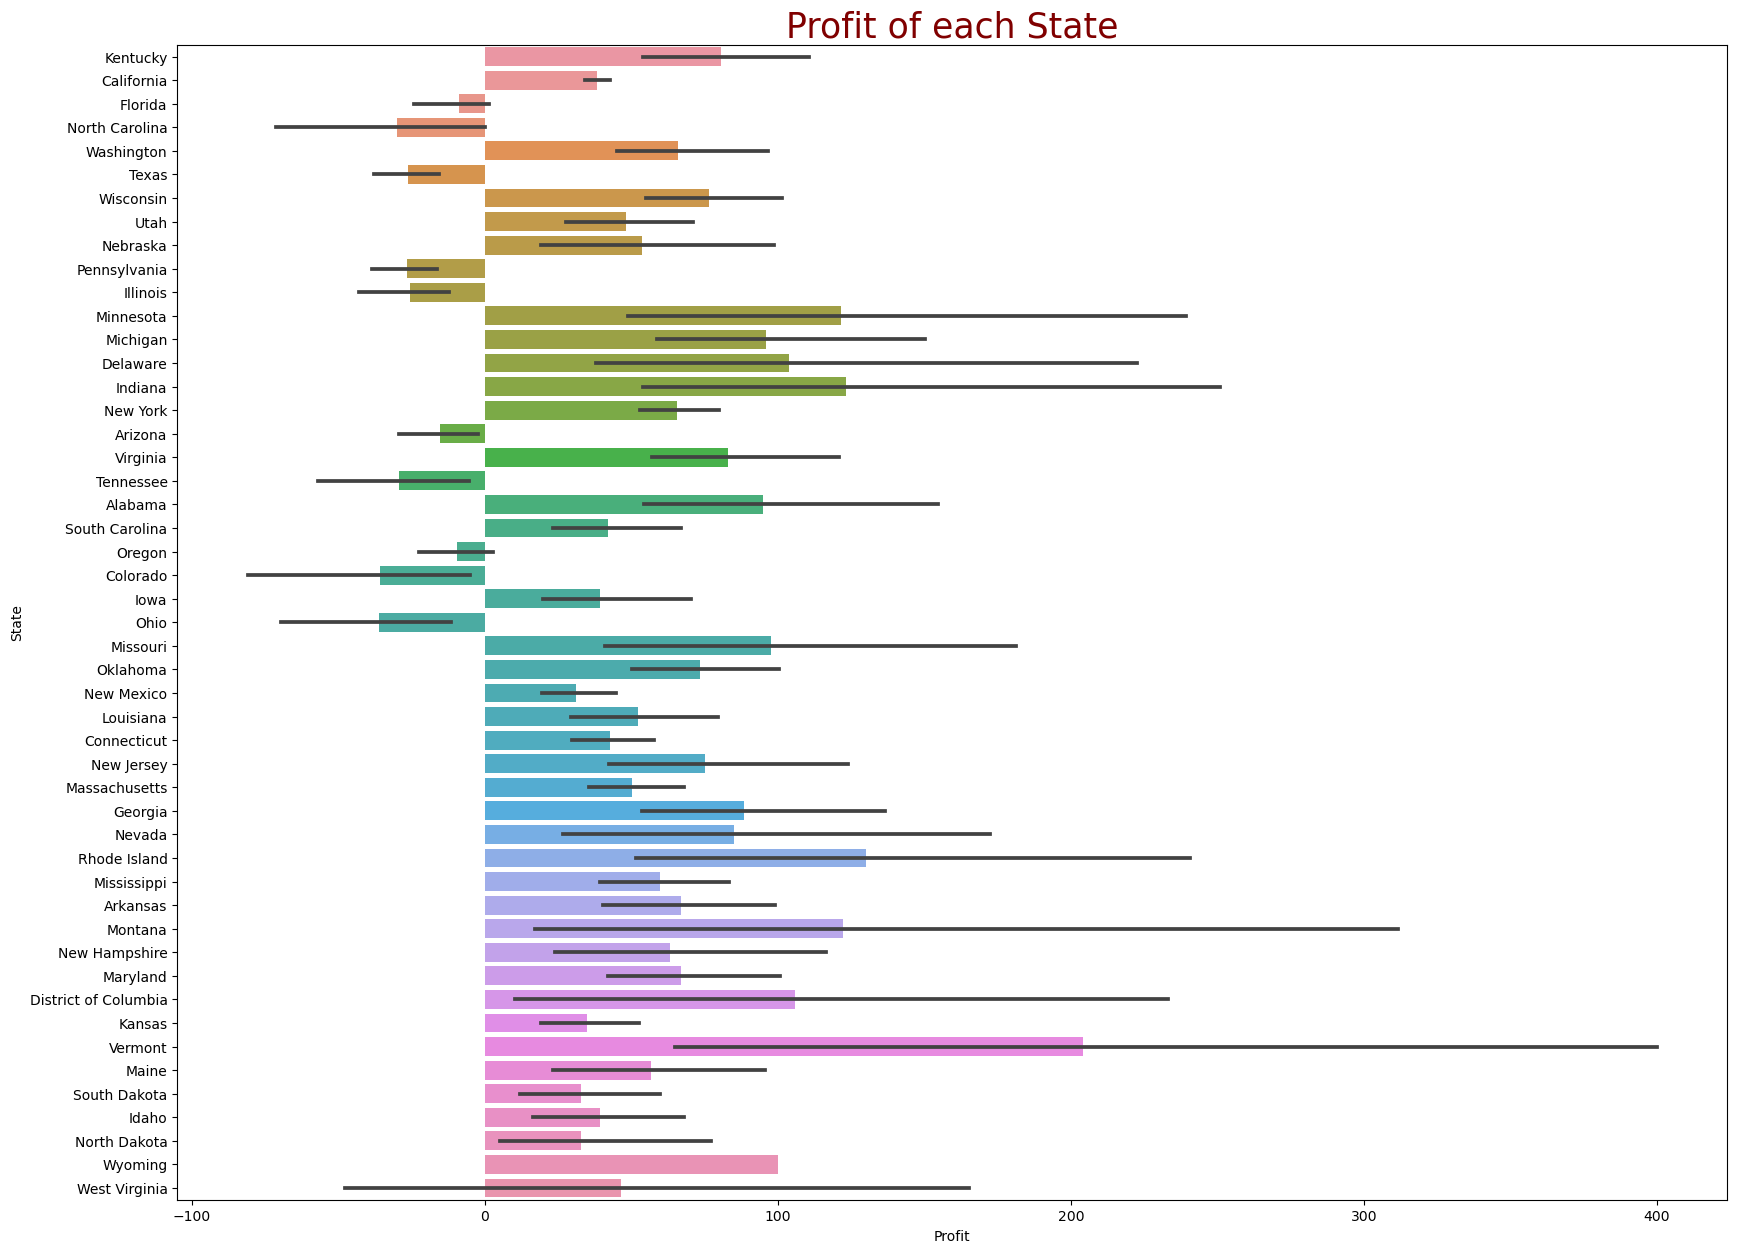

In [19]:
plt.rcParams['figure.figsize'] = (20,15)
sns.barplot(data=train,x='Profit',y='State')
plt.title('Profit of each State',fontsize=25,color='maroon')